<img src="https://apionline.sodapdf.com/Public/widgets/convertmyimage/download/logo.gif" style="float: right;"> 


# Comprehensive Care for Joint Replacement (CJR) model 
## October Marketing Research Analysis

##### Zerin Dong

In [75]:
## import packages
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [76]:
## read file
df = pd.read_csv('/Users/zerindong/Desktop/Bluejay/marketing research/CJR/CJR_initialyear_analysis.csv')

# 1. Exploratory Data Analysis (EDA)

In [77]:
## browse your dataset
df.head()

,Provider Number,Facility Name,Code,State,MSA Name,Quality Performance Category,Number of Episodes*,Reconciliation Amount (waged)
0,10023,Baptist Medical Center South,AL,Alabama,"Montgomery, AL",Good,175,184740.29250
1,10092,DCH Regional Medical Center,AL,Alabama,"Tuscaloosa, AL",Good,235,139996.31730
2,10055,Flowers Hospital,AL,Alabama,"Dothan, AL",Good,104,114914.67900
3,10001,Southeast Alabama Medical Center,AL,Alabama,"Dothan, AL",Acceptable,93,69520.98962
4,10024,"Jackson Hospital and Clinic, Inc.",AL,Alabama,"Montgomery, AL",Excellent,80,56868.62152


In [78]:
df.isnull().sum()

Provider Number                  0
Facility Name                    0
Code                             0
State                            0
MSA Name                         0
Quality Performance Category     0
Number of Episodes*              0
Reconciliation Amount (waged)    0
dtype: int64

#### No missing obs in our dataset

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 8 columns):
Provider Number                  382 non-null int64
Facility Name                    382 non-null object
Code                             382 non-null object
State                            382 non-null object
MSA Name                         382 non-null object
Quality Performance Category     382 non-null object
Number of Episodes*              382 non-null int64
Reconciliation Amount (waged)    382 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 23.9+ KB


In [80]:
### rename the variables
df.rename(columns= {
        'Provider Number':'id',
        'Facility Name':'name',
        'State':'state',
        'MSA Name':'MSA',
        'Quality Performance Category':'performance',
        'Number of Episodes*':'episodes',
        'Reconciliation Amount (waged)':'reconciliation',
        'Code':'code'
},inplace=True)

In [81]:
df['performance'].value_counts()

Good          201
Excellent     150
Acceptable     31
Name: performance, dtype: int64

In [82]:
df['performance']=df['performance'].str.replace('Good','2')
df['performance']=df['performance'].str.replace('Excellent','3')
df['performance']=df['performance'].str.replace('Acceptable','1')
df.performance = df.performance.convert_objects(convert_numeric=True)

/Users/zerindong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [83]:
df.head()

,id,name,code,state,MSA,performance,episodes,reconciliation
0,10023,Baptist Medical Center South,AL,Alabama,"Montgomery, AL",2,175,184740.29250
1,10092,DCH Regional Medical Center,AL,Alabama,"Tuscaloosa, AL",2,235,139996.31730
2,10055,Flowers Hospital,AL,Alabama,"Dothan, AL",2,104,114914.67900
3,10001,Southeast Alabama Medical Center,AL,Alabama,"Dothan, AL",1,93,69520.98962
4,10024,"Jackson Hospital and Clinic, Inc.",AL,Alabama,"Montgomery, AL",3,80,56868.62152


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,382.0,260080.738220,159390.225146,10001.000000,100167.250000,310036.000000,380032.000000,670061.000
performance,382.0,2.311518,0.614628,1.000000,2.000000,2.000000,3.000000,3.000
episodes,382.0,86.785340,97.483378,1.000000,20.000000,58.500000,122.750000,850.000
reconciliation,382.0,98413.956105,131229.990445,348.664358,17816.509207,58146.978335,126565.421825,1293224.519


In [99]:
print df.code.value_counts()

CA    51
FL    41
NY    40
PA    25
NJ    22
TX    20
IN    18
WI    17
OH    14
CO    13
LA    13
KS    12
MO    12
WA    11
OR    11
NC    11
OK     8
TN     7
SC     5
AL     5
NM     4
IL     4
CT     3
UT     3
MI     3
GA     2
AR     2
NE     2
ND     2
VA     1
Name: code, dtype: int64


# 2. Data Visualization

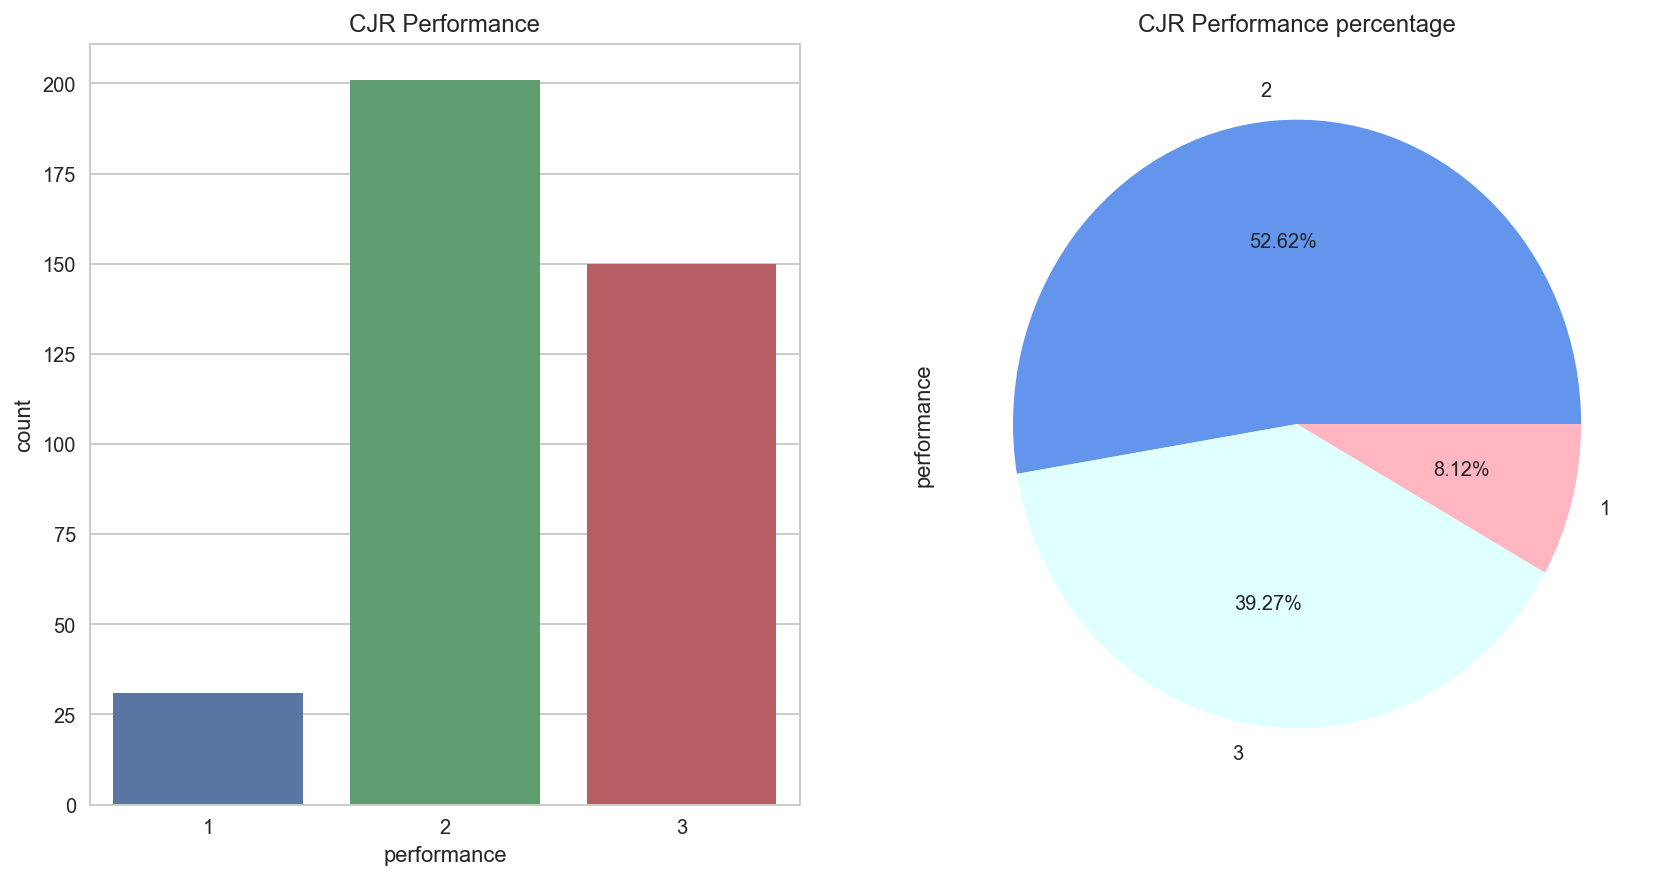

In [93]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='performance',data=df,ax=axs[0])
axs[0].set_title("CJR Performance")
df.performance.value_counts().plot(x=None,y=None, colors=['cornflowerblue','lightcyan','lightpink'],kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("CJR Performance percentage")
plt.show()

In [68]:
df_code =df.groupby(['code']).sum()['reconciliation'].reset_index()
df_code2 =df.groupby(['code']).sum()['episodes'].reset_index()

In [95]:
df3 = pd.merge(df_code, df_code2, on='code', how='outer')

In [98]:
print df3

   code  reconciliation  episodes
0    AL    5.660409e+05       687
1    AR    2.315772e+05       202
2    CA    4.384816e+06      3449
3    CO    9.646516e+05       889
4    CT    2.221852e+05       228
5    FL    3.038424e+06      3126
6    GA    3.182938e+05       318
7    IL    2.328372e+05       356
8    IN    1.885671e+06      1884
9    KS    8.351983e+05      1121
10   LA    5.376285e+05       535
11   MI    2.811746e+05       388
12   MO    7.104839e+05      1033
13   NC    9.864220e+05      1037
14   ND    2.104547e+05       225
15   NE    3.718066e+05       455
16   NJ    4.524841e+06      2832
17   NM    3.921243e+05       403
18   NY    6.176736e+06      4029
19   OH    1.444588e+06      1442
20   OK    5.593551e+05       614
21   OR    6.202085e+05       507
22   PA    2.199059e+06      1914
23   SC    3.260679e+05       302
24   TN    7.997709e+05       751
25   TX    1.814381e+06      1741
26   UT    3.860730e+05       415
27   VA    2.270305e+05       231
28   WA    8.1

In [14]:
df2=df

In [52]:
import plotly.plotly as py
import pandas as pd

for col in df2.columns:
    df2[col] = df2[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df2['text'] = df2['state'] + '<br>' +\
    'Reconciliation Amount'+df2['reconciliation']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df2['reconciliation'].astype(float),
        locationmode = 'USA-states',
        text = df2['text'],
        marker = dict(
            line = dict (
                color = 'rgb(120,120,120)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = '2017 US Reconciliation Amount (waged)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(120,120,120)'), 
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

# 3. Modeling
## 3.1 OLS

In [15]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
#     dist = sns.distplot(data, kde=False, bins=30)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

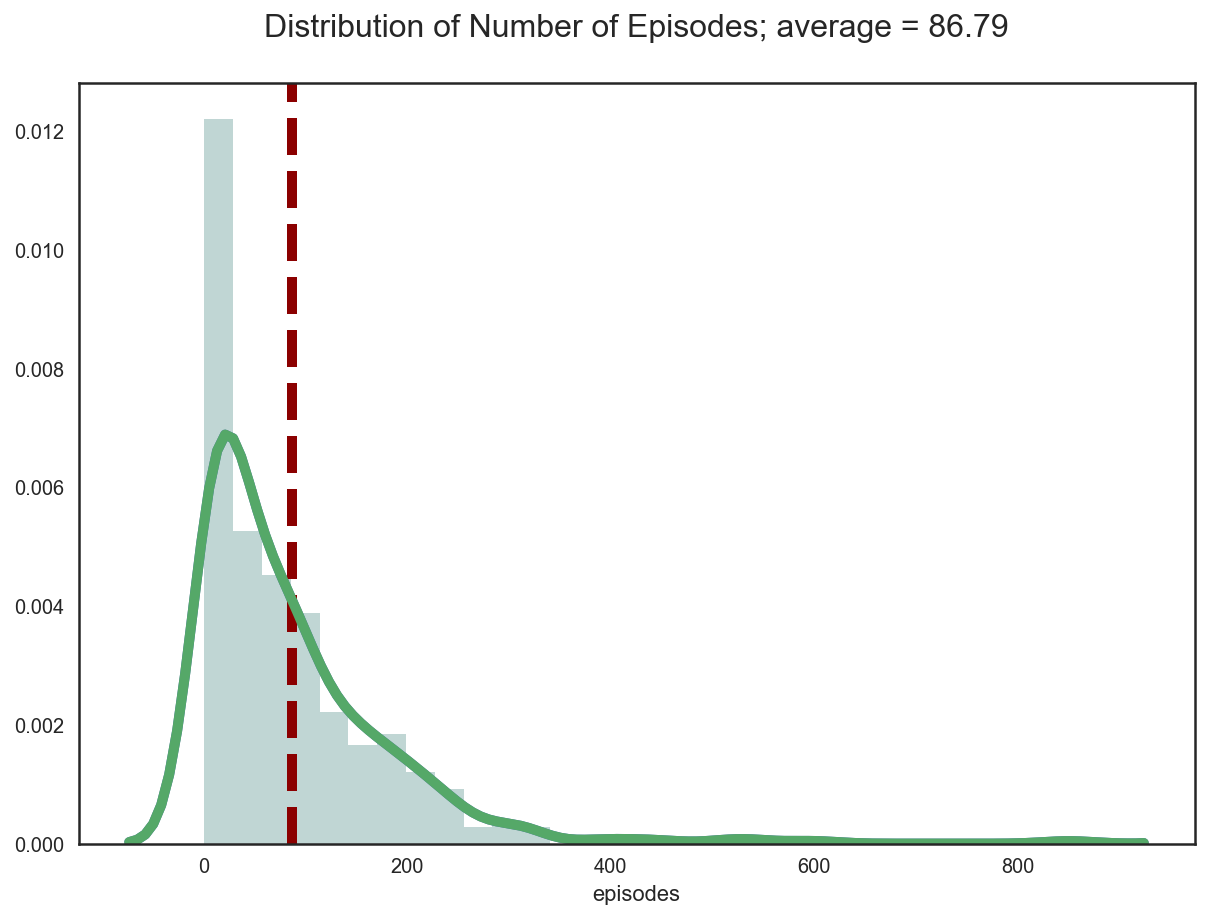

In [16]:
histogram_plotter("Number of Episodes", df.episodes)

In [17]:
df['log_episodes'] = np.log(df.episodes) 

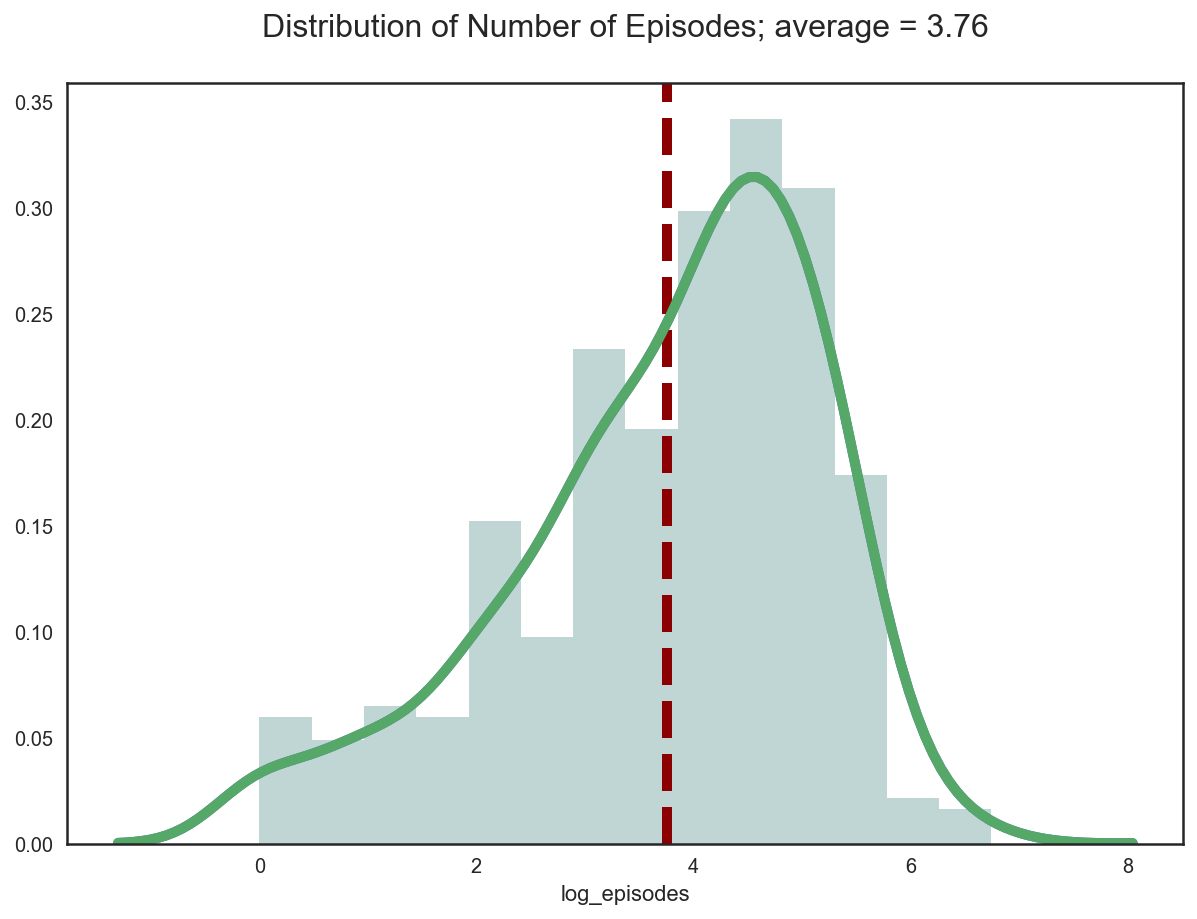

In [18]:
histogram_plotter("Number of Episodes", df.log_episodes)

In [19]:
df['log_reconciliation'] = np.log(df.reconciliation)

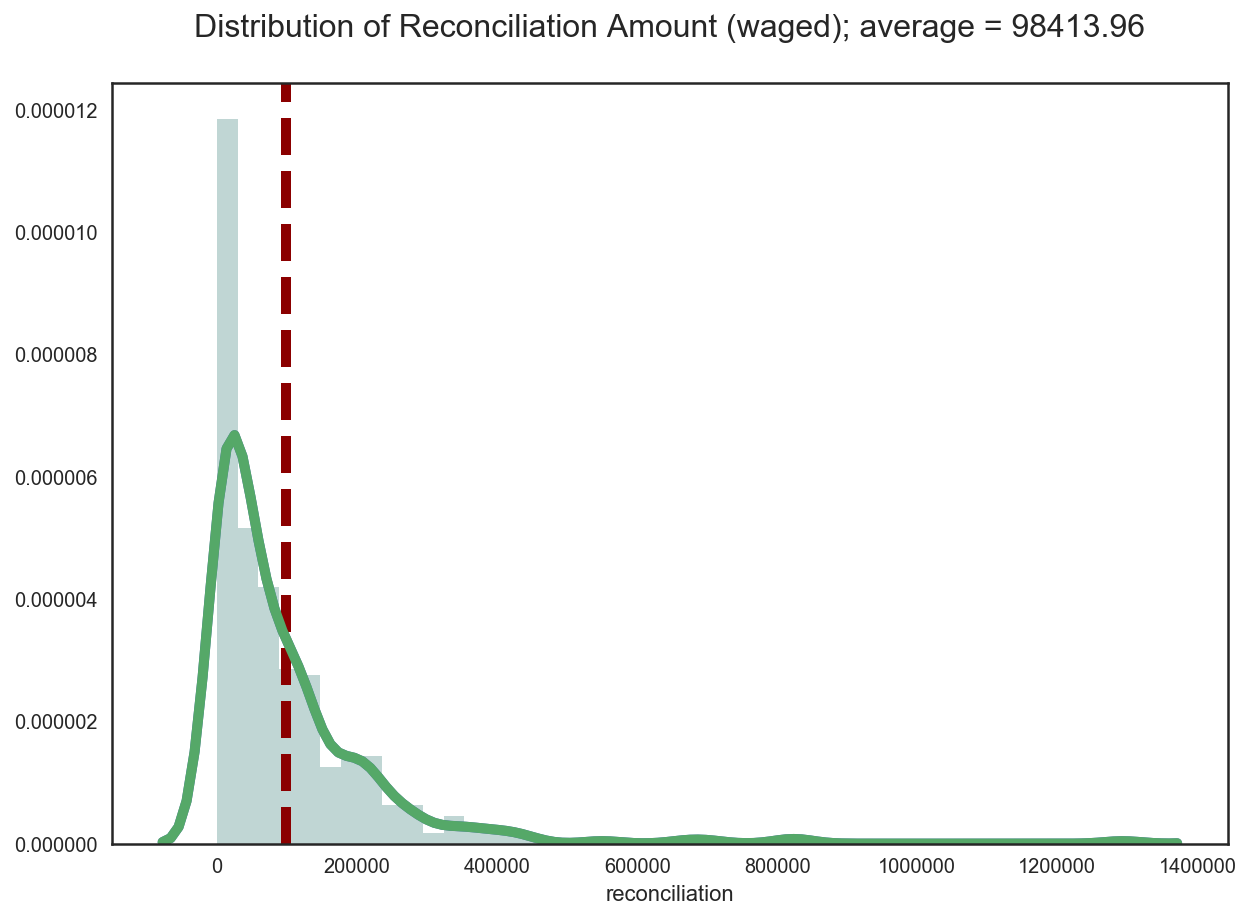

In [20]:
histogram_plotter("Reconciliation Amount (waged)", df.reconciliation)

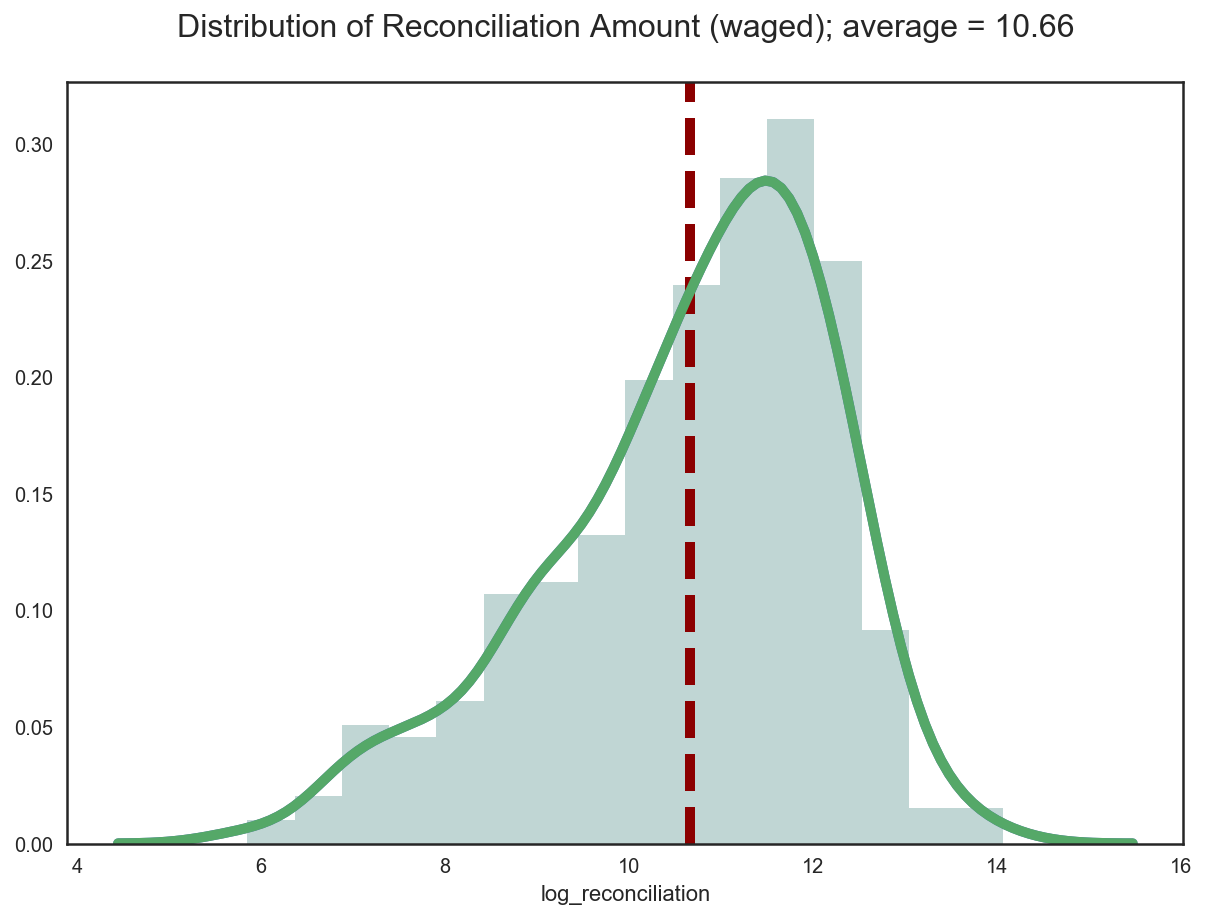

In [21]:
histogram_plotter("Reconciliation Amount (waged)", df.log_reconciliation)

From the histrogram charts above, we can see that both "episodes" and "reconciliation" suffer "Right-Skewed" problem. In order to minimize model bias, I will use the log-term in the ols regression.

In [22]:
import statsmodels.formula.api as smf
lm_stats = smf.ols(formula='log_reconciliation ~ log_episodes', data=df).fit()
print lm_stats.summary()

                            OLS Regression Results                            
Dep. Variable:     log_reconciliation   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1198.
Date:                Mon, 30 Oct 2017   Prob (F-statistic):          1.62e-119
Time:                        09:16:02   Log-Likelihood:                -432.54
No. Observations:                 382   AIC:                             869.1
Df Residuals:                     380   BIC:                             877.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1104      0.110     64.837   

In [23]:
## Access and print the parameters
lm_stats.params

Intercept       7.110365
log_episodes    0.944980
dtype: float64

In general, every 1% change of Episode increases the Reconciliation amount by 0.94 percent.

## 3.2 Machine Learning Algorithm

In this section, my research goal is to find out the optimal algorithm to predict the Surgery Preformance. 

In [24]:
cjr = pd.read_csv('/Users/zerindong/Desktop/Bluejay/marketing research/CJR/CJR_initialyear_analysis.csv')

In [25]:
cjr.head()

,Provider Number,Facility Name,Code,State,MSA Name,Quality Performance Category,Number of Episodes*,Reconciliation Amount (waged)
0,10023,Baptist Medical Center South,AL,Alabama,"Montgomery, AL",Good,175,184740.29250
1,10092,DCH Regional Medical Center,AL,Alabama,"Tuscaloosa, AL",Good,235,139996.31730
2,10055,Flowers Hospital,AL,Alabama,"Dothan, AL",Good,104,114914.67900
3,10001,Southeast Alabama Medical Center,AL,Alabama,"Dothan, AL",Acceptable,93,69520.98962
4,10024,"Jackson Hospital and Clinic, Inc.",AL,Alabama,"Montgomery, AL",Excellent,80,56868.62152


In [26]:
cjr = cjr.drop(['Provider Number','Facility Name','State','Code','MSA Name'],axis=1)

In [27]:
cjr.rename(columns= {
        'Quality Performance Category':'performance',
        'Number of Episodes*':'episodes',
        'Reconciliation Amount (waged)':'reconciliation'
},inplace=True)

In [28]:
cjr.head()

,performance,episodes,reconciliation
0,Good,175,184740.29250
1,Good,235,139996.31730
2,Good,104,114914.67900
3,Acceptable,93,69520.98962
4,Excellent,80,56868.62152


In [29]:
mapping_dict = {'performance':{'Good':1,'Excellent': 1,'Acceptable':0}}
cjr = cjr.replace(mapping_dict)
cjr = cjr[(cjr['performance'] == 1) | (cjr['performance'] == 0)]

In [30]:
print cjr['performance'].value_counts()

1    351
0     31
Name: performance, dtype: int64


### 3.2.1 Logistic Regression

In [31]:
columns_ = cjr.columns.tolist()
exclude_cols = ['performance']

y = cjr.performance.values

X = cjr[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape

(382,) (382, 2)


In [32]:
### split the dataset into train and test
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(267, 2) (267,)
(115, 2) (115,)


/Users/zerindong/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logistic, search_parameters, cv=5, verbose=1, n_jobs=-1)

/Users/zerindong/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [34]:
estimator.fit(X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    4.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

### Model Evaluation

In [35]:
log_best = estimator.best_estimator_
print "Best estimators on the left out data:\n", log_best

print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
# This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=2, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.0

Best Params on hold out data (train):
{'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}

Best Score on left out data:0.921 



In [36]:
from sklearn.metrics import confusion_matrix
y_pred=estimator.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 ', 'True_Label_1'],
                         columns=['Predict_Label_0', 'Predict_Label_1'])

confusion

,Predict_Label_0,Predict_Label_1
True_Label_0,0,10
True_Label_1,0,105


In [37]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.91      1.00      0.95       105

avg / total       0.83      0.91      0.87       115



/Users/zerindong/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


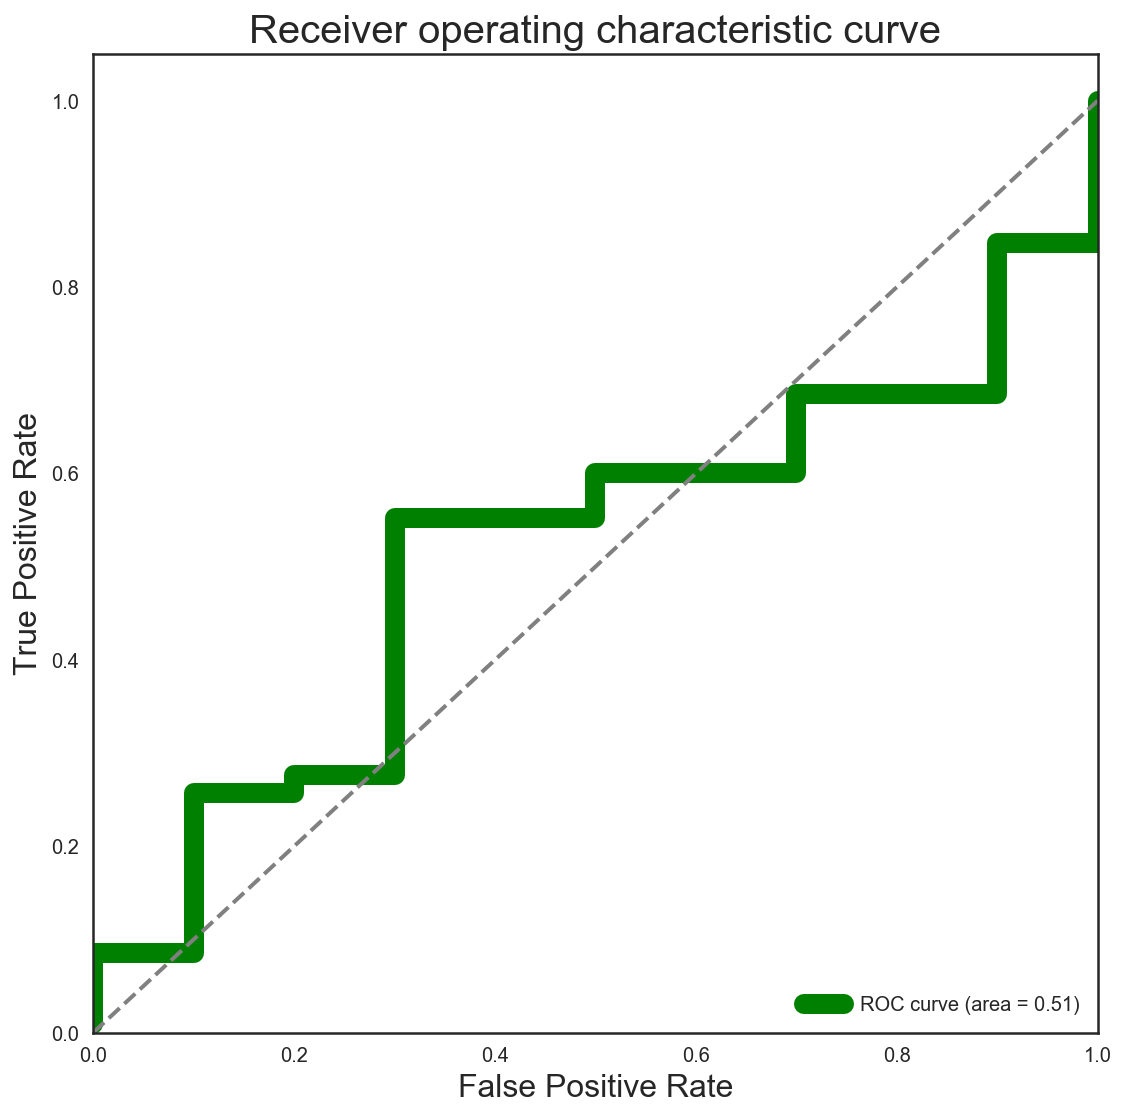

In [38]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

### 3.2.2 SVM

In [39]:
cjr['performance'].unique()

array([1, 0])

In [40]:
X = cjr.drop(['performance'], axis = 1)
y = cjr['performance']

In [41]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [42]:
#baseline => 65%
y.value_counts() / len(y)

1    0.918848
0    0.081152
Name: performance, dtype: float64

In [43]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
'''Linear Model'''

lin_model = SVC(kernel='linear')

scores = cross_val_score(lin_model, Xn, y, cv=5)
sm = scores.mean()
ss = scores.std()
print "Average score: {:0.3} +/- {:0.3}".format(sm, ss)

Average score: 0.919 +/- 0.00432


In [44]:
rbf_model = SVC(kernel='rbf')
'''radial basis function kernel model'''
scores = cross_val_score(rbf_model, Xn, y, cv=5)
sm = scores.mean()
ss = scores.std()
print "Average score: {:0.3} +/- {:0.3}".format(sm, ss)

Average score: 0.919 +/- 0.00432


In [45]:
from sklearn.metrics import classification_report

def print_cm_cr(y_true, y_pred):
    """prints the confusion matrix and the classification report"""
    confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print confusion
    print
    print classification_report(y_true, y_pred)
    

In [46]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.33)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_cm_cr(y_test, y_pred)


Predicted    1  All
Actual             
0           10   10
1          117  117
All        127  127

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.92      1.00      0.96       117

avg / total       0.85      0.92      0.88       127



### 3.2.3 KNN

In [47]:
X = cjr.drop('performance', axis=1)
y = cjr['performance']

In [48]:
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.33)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_cm_cr(y_test, y_pred)

Predicted    1  All
Actual             
0           10   10
1          117  117
All        127  127

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.92      1.00      0.96       117

avg / total       0.85      0.92      0.88       127



In [50]:
# gridsearch kNN
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors':range(1,51),
    'weights':['distance','uniform']
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)
knn_gs.fit(Xn, y)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [51]:
knn_best = knn_gs.best_estimator_
print knn_gs.best_params_
print knn_gs.best_score_

{'n_neighbors': 9, 'weights': 'uniform'}
0.918848167539
